In [19]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [20]:
num_classes=10
np.random.seed(133)
data_root='.'
train_filename= os.path.join(data_root, 'notMNIST_large.tar.gz') #join os root and extention(dataroot)
test_filename= os.path.join(data_root, 'notMNIST_small.tar.gz')

def maybe_extract(filename, force=False):
    root=os.path.splitext(os.path.splitext(filename)[0])[0] #splits the os root and extension 
    if os.path.isdir(root)and not force:
        print('%s already present - Skipping extraction of %s' %(root, filename))
    else:
        print('extracting data %s.this may take a while .please wait.' %root)
        tar=tarfile.open(filename)
        sys.stdout.flush()
        tar.extractall(data_root)
        tar.close()
    data_folders = [
        os.path.join(root, d)for d in sorted(os.listdir(root)) #listing all the classes directory
        if os.path.isdir(os.path.join(root, d))]
    if len(data_folders) !=num_classes: #checks lengths
        raise Exception(
            'Expected %d folders , one per class. found %d instead.' % (
                num_classes,len(data_folders)))
    print(data_folders)
    return data_folders
    
    
train_folders= maybe_extract(train_filename)
test_folders=maybe_extract(test_filename)
            
        
    
    
    

./notMNIST_large already present - Skipping extraction of ./notMNIST_large.tar.gz
['./notMNIST_large/A', './notMNIST_large/B', './notMNIST_large/C', './notMNIST_large/D', './notMNIST_large/E', './notMNIST_large/F', './notMNIST_large/G', './notMNIST_large/H', './notMNIST_large/I', './notMNIST_large/J']
./notMNIST_small already present - Skipping extraction of ./notMNIST_small.tar.gz
['./notMNIST_small/A', './notMNIST_small/B', './notMNIST_small/C', './notMNIST_small/D', './notMNIST_small/E', './notMNIST_small/F', './notMNIST_small/G', './notMNIST_small/H', './notMNIST_small/I', './notMNIST_small/J']


In [27]:
image_size=28 #pixel width and height
pixel_depth=255.0 #Nurmber of levels per pixel

def load_letter(folder, min_num_images):
    """Load the data for a single letter label"""
    image_files=os.listdir(folder)
    dataset=np.ndarray(shape=(len(image_files),image_size, image_size),dtype=np.float32)
    print(folder)
    num_images=0
    for image in image_files:
        image_file=os.path.join(folder,image)
        try:
            image_data=(ndimage.imread(image_file).astype(float) - pixel_depth /2)/pixel_depth
            if image_data.shape !=(image_size,image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
            dataset[num_images,:,:]=image_data
            num_images=num_images + 1
        except IOError as e:
            print('couldnot read :', image_file , ':', e , '-it\'s ok , skipping.')
    dataset=dataset[0:num_images, :, :]
    if num_images < min_num_images:
        raise Exception('many fewer images then expected: %d < %d' % (num_images, min_num_images))
    print('Full dataset tensor:', dataset.shape)
    print('mean:', np.mean(dataset))
    print('standard deviation:', np.std(dataset))
    return dataset

def maybe_pickle(data_folders, min_num_images_per_class, force=False):
    dataset_names=[]
    for folder in data_folders:
        set_filename=folder+ '.pickle'
        dataset_names.append(set_filename)
        if os.path.exists(set_filename)and not force:
            print('%s already present - skipping pickling.' % set_filename)
        else:
            print('pickling %s.' % set_filename)
            dataset=load_letter(folder,min_num_images_per_class)
            try:
                with open(set_filename, 'wb')as f:
                    pickle.dump(dataset,f, pickle.HIGHEST_PROTOCOL)
            except Exception as e:
                print('Unable to save data to', set_filename, ':',e)
    return dataset_names
train_datasets=maybe_pickle(train_folders, 45000)#Not MNIST Large
test_datasets=maybe_pickle(test_folders, 1800)#Not MNIST SMALL



pickling ./notMNIST_large/A.pickle.
./notMNIST_large/A
couldnot read : ./notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png : cannot identify image file './notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png' -it's ok , skipping.
couldnot read : ./notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png : cannot identify image file './notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png' -it's ok , skipping.
couldnot read : ./notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png : cannot identify image file './notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png' -it's ok , skipping.
Full dataset tensor: (52909, 28, 28)
mean: -0.12825
standard deviation: 0.44312
pickling ./notMNIST_large/B.pickle.
./notMNIST_large/B
couldnot read : ./notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png : cannot identify image file './notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png' -it's ok , skipping.
Full dataset tensor: (52911, 28, 28)
mean: -0.00756303
standard deviation: 0.454491
pickli

(52909, 28, 28)
41480656
[[-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.48823529 -0.5
  -0.20588236  0.31568629 -0.44901961 -0.49607843 -0.49607843 -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5       ]
 [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.49215686 -0.5
   0.21372549  0.5        -0.14313726 -0.5        -0.48823529 -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5       ]
 [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.48823529 -0.5        -0.30784315
   0.48039216  0.49607843  0.25294119 -0.5        -0.49607843 -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5       ]
 [-0.5     

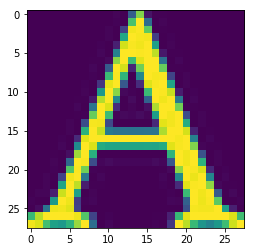

In [36]:

import matplotlib.image as mpimg
read_pickle = pickle.load( open( "notMNIST_large/A.pickle", "rb" ) )
print (read_pickle.shape)
print (read_pickle.size)
#print (read_pickle)
print (read_pickle[0])
imgplot = plt.imshow(read_pickle[0])


In [ ]:
def make_arrays(nb_rows, img_size):
    if nb_rows:
        dataset=np.ndarray((nb_rows, img_size , img_size), dtype=np.float32)
        labels=np